In [1]:
from transformers import AutoFeatureExtractor, ASTForAudioClassification
from datasets import load_dataset
import torch

dataset = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation")
dataset = dataset.sort("id")
sampling_rate = dataset.features["audio"].sampling_rate

feature_extractor = AutoFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
model = ASTForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

# audio file is decoded on the fly
inputs = feature_extractor(dataset[0]["audio"]["array"], sampling_rate=sampling_rate, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_ids = torch.argmax(logits, dim=-1).item()
predicted_label = model.config.id2label[predicted_class_ids]
predicted_label

# compute loss - target_label is e.g. "down"
target_label = model.config.id2label[0]
inputs["labels"] = torch.tensor([model.config.label2id[target_label]])
loss = model(**inputs).loss
round(loss.item(), 2)

C:\Users\gerso\anaconda3\envs\ai-for-elephants\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset librispeech_asr_demo (C:/Users/gerso/.cache/huggingface/datasets/hf-internal-testing___librispeech_asr_demo/clean/2.1.0/d3bc4c2bc2078fcde3ad0f0f635862e4c0fef78ba94c4a34c4c250a097af240b)


0.17

In [2]:
dataset[0]["audio"]["array"].shape

(93680,)

In [8]:
inputs["input_values"].shape

torch.Size([1, 1024, 128])

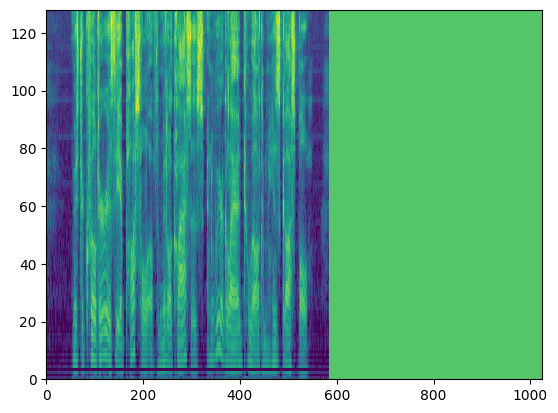

In [13]:
import matplotlib.pyplot as plt

plt.pcolormesh(inputs["input_values"][0].numpy().T)

plt.show()

In [4]:
logits.shape

torch.Size([1, 527])

In [5]:
sampling_rate

16000

In [11]:
from IPython.core.display_functions import display
import IPython.display as ipd
display(ipd.Audio(dataset[0]["audio"]["array"], rate=16000))

In [12]:
target_label

'Speech'

In [19]:
out = model(**inputs, output_hidden_states =True)

In [25]:
out['hidden_states'][0].shape

torch.Size([1, 1214, 768])